In [1]:
import pandas as pd
import sqlite3

In [2]:
con = sqlite3.connect('../data/checking-logs.sqlite')

In [3]:
df = pd.io.sql.read_sql('''SELECT * 
                        FROM pageviews
                        WHERE uid LIKE "user_%"''', con, 
                        parse_dates=['datetime'])

In [4]:
df.head()

,index,uid,datetime
0,12,user_30,2020-04-17 22:46:26.785035
1,14,user_14,2020-04-18 10:53:52.623447
2,15,user_17,2020-04-18 10:56:55.833899
3,16,user_14,2020-04-18 10:57:37.331258
4,18,user_17,2020-04-18 12:05:48.200144


In [5]:
df_group = df.groupby(by=df['datetime'].dt.date)['uid'].count().reset_index()
df_group.columns = ['date', 'views']
df_group.set_index('date', inplace = True)

In [6]:
df_group.head()

,views
date,
2020-04-17,1
2020-04-18,23
2020-04-19,15
2020-04-21,3
2020-04-22,1


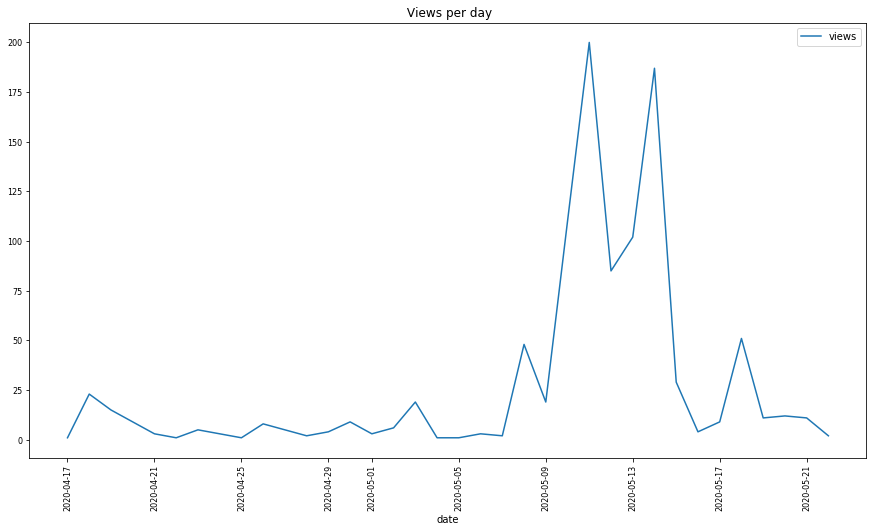

In [7]:
df_group.plot(fontsize=8, figsize=(15,8), title=' Views per day', rot=90)

In [8]:
con.close()